# Tarea 3.1
Sustitución de datos faltantes
Jorge Alejandro Díaz Sánchez

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tratamiento_de_valores_faltantes.csv")
df

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199
...,...,...,...,...
495,7.851055,Tailandés,4.159333,3.100521
496,12.174165,Comida rápida,6.004050,2.917600
497,10.984803,Italiano,6.017403,2.979846
498,7.420852,Chino,7.327392,2.819767


In [3]:
df.isna().sum()

x1    18
x2    20
x3    14
x4    17
dtype: int64

## Datos faltantes
Existen datos faltantes en cada una de las cuatro variables faltantes.

### Tratamiento para $x_1$
Se observa la distribución y kurtosis de x1

<AxesSubplot:>

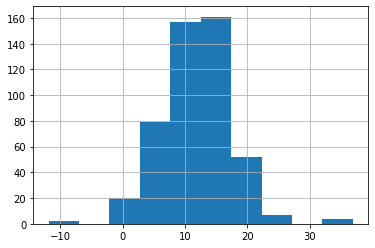

In [4]:
df["x1"].hist()

In [5]:
df.x1.kurtosis()

3.157644127799247

<AxesSubplot:>

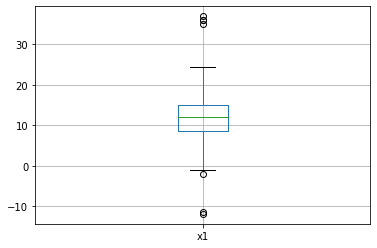

In [6]:
df.boxplot("x1")


Con esta distribución podemos ver cierta forma normal, con una alta kurtosis, y valores atípicos. Dados estos valores atípicos, lo mejor probablemente será usar la mediana para reemplazar los datos faltantes:

In [7]:
df["x1"].describe()

count    482.000000
mean      11.946714
std        5.519551
min      -11.866135
25%        8.513927
50%       11.997242
75%       15.061229
max       36.922954
Name: x1, dtype: float64

In [8]:
# Usemos la mediana (Mediana de 11.997242)
median = df['x1'].median()
df['x1'].fillna(median, inplace=True)
df.isna().sum()

x1     0
x2    20
x3    14
x4    17
dtype: int64

In [9]:
df["x1"].median() # No se ve afectada.

11.997241740674525

### Tratamiento para $x_2$
Dado que $x_2$ es una variable categórica, analicemos su moda, y sustituyamos con esta moda.

In [10]:
mode, = df["x2"].mode()
mode

'Mexicano'

In [11]:
# Dado que la moda para x2 es "Mexicano", reemplacemos datos faltantes con Mexicano.
df['x2'].fillna(mode, inplace=True)
df['x2']

0      Comida rápida
1           Mexicano
2           Italiano
3      Comida rápida
4              Chino
           ...      
495        Tailandés
496    Comida rápida
497         Italiano
498            Chino
499            Chino
Name: x2, Length: 500, dtype: object

In [12]:
df.isna().sum()

x1     0
x2     0
x3    14
x4    17
dtype: int64

In [13]:
df['x2'].mode() # No se ve afectada

0    Mexicano
Name: x2, dtype: object

### Tratamiento para $x_3$

$x_3$ es una variable contínua, analicemos su distribución:


<AxesSubplot:>

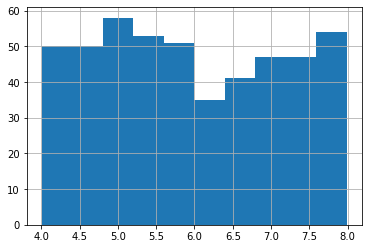

In [14]:
df["x3"].hist()

In [15]:
df["x3"].kurtosis()

-1.2603082637679541

Con una kurtosis tan baja (menor a -1.2), se considera una distribución uniforme.
Por lo que se tendrá que usar una sustitución aleatoria.

In [16]:
# Veamos cuántos datos faltantes hay y guardemos sus posiciones:
missing, = np.where(df.x3.isna())
len(missing)


14

In [17]:
# Apartemos los datos que sí están completos (válidos):
valid = df.x3[df.x3.notna()]
len(valid)

486

In [18]:
# Se eligen 14 valores aleatorios dentro de los datos válidos
new_vals = np.random.randint(1, len(valid), len(missing))
new_vals

array([378, 403, 127, 178,  97, 306, 399, 398, 444, 290,   5, 323,  62,
       231])

In [19]:
# Ahora se reemplazan
df['x3'].loc[missing] = valid.iloc[new_vals].values
df['x3'].loc[new_vals]

/var/folders/51/l057c8xx2md597vhk47n57rm0000gn/T/ipykernel_23779/408195769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x3'].loc[missing] = valid.iloc[new_vals].values


378    4.063302
403    4.628271
127    5.777499
178    6.337388
97     7.694994
306    7.728366
399    7.061122
398    6.162329
444    4.255196
290    7.141680
5      4.605607
323    6.192521
62     4.635577
231    4.843168
Name: x3, dtype: float64

In [20]:
df.isna().sum()

x1     0
x2     0
x3     0
x4    17
dtype: int64

### Tratamiento para $x_4$
$x_4$ también es cuantitativa, analicemos su distribución

<AxesSubplot:>

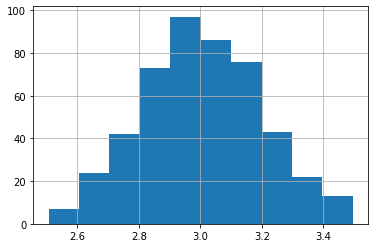

In [21]:
df['x4'].hist()

In [30]:
df["x4"].kurt()

-0.29078117515223445

<AxesSubplot:>

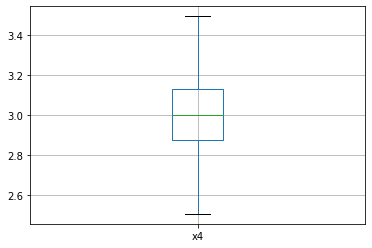

In [31]:
df.boxplot("x4")

Esta distribución para ser normal, y no se encuentran valores atípicos, por lo que se usará la media.

In [34]:
# Veamos la media
mean = df["x4"].mean()
mean

3.0037859880503586

In [35]:
# Se usará esta media para reemplazar los valores faltantes
df['x4'].fillna(mean, inplace=True)
df['x4']

0      2.790293
1      3.330853
2      2.895753
3      3.393178
4      2.901199
         ...   
495    3.100521
496    2.917600
497    2.979846
498    2.819767
499    3.056515
Name: x4, Length: 500, dtype: float64

In [38]:
df.x4.mean()  # No se ve tan alterada

3.003785988050361

## Verificación

In [40]:
# veamos que ya no hay valores faltantes:
df.isna().sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64